In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [460]:
df = pd.read_csv("VNM.csv")

In [461]:
df

,Date,Close,Open,High,Low,Volume,Change %
0,12/1/2017,159039,151736,159039,151736,1.50M,4.98%
1,12/4/2017,164719,159039,166423,159039,1.70M,3.57%
2,12/5/2017,161473,164719,166342,160662,852.08K,-1.97%
3,12/6/2017,158227,158227,159850,151898,1.14M,-2.01%
4,12/7/2017,150924,158227,160580,150924,1.43M,-4.62%
...,...,...,...,...,...,...,...
1369,6/1/2023,66100,66100,66500,66000,1.21M,0.00%
1370,6/2/2023,65900,66200,66300,65500,2.97M,-0.30%
1371,6/5/2023,66500,66500,67200,66200,3.32M,0.91%
1372,6/6/2023,66400,66900,66900,66000,3.42M,-0.15%


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1374 non-null   object
 1   Close     1374 non-null   int64 
 2   Open      1374 non-null   int64 
 3   High      1374 non-null   int64 
 4   Low       1374 non-null   int64 
 5   Volume    1374 non-null   object
 6   Change %  1374 non-null   object
dtypes: int64(4), object(3)
memory usage: 75.3+ KB


In [463]:
df.describe()

,Close,Open,High,Low
count,1374.000000,1374.000000,1374.000000,1374.000000
mean,96585.031295,96635.538574,97550.085153,95721.057496
std,25435.568450,25432.562406,25691.840981,25140.072074
min,61260.000000,61830.000000,63160.000000,61260.000000
25%,79132.250000,79132.250000,79965.750000,78546.000000
50%,93176.000000,93084.500000,93888.500000,92105.000000
75%,102541.750000,102543.000000,103542.750000,101692.000000
max,175578.000000,175333.000000,175742.000000,174189.000000


In [464]:
#gắng index với giá Close
df1=df.reset_index()['Close']

In [465]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [466]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [467]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [468]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [469]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
#thay đổi kích thước của dữ liệu đầu vào để phù hợp với yêu cầu đầu vào của mô hình LSTM.
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [470]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [471]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 15s 386ms/step - loss: 0.0323 - val_loss: 0.0019
Epoch 2/100
16/16 [==============================] - 4s 281ms/step - loss: 0.0053 - val_loss: 0.0024
Epoch 3/100
16/16 [==============================] - 5s 303ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 4/100
16/16 [==============================] - 5s 293ms/step - loss: 0.0018 - val_loss: 9.7994e-04
Epoch 5/100
16/16 [==============================] - 4s 276ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
16/16 [==============================] - 4s 267ms/step - loss: 0.0016 - val_loss: 9.5585e-04
Epoch 7/100
16/16 [==============================] - 4s 247ms/step - loss: 0.0016 - val_loss: 9.7346e-04
Epoch 8/100
16/16 [==============================] - 4s 242ms/step - loss: 0.0015 - val_loss: 9.9703e-04
Epoch 9/100
16/16 [==============================] - 6s 354ms/step - loss: 0.0015 - val_loss: 9.1574e-04
Epoch 10/100
16/16 [==============================] - 5s 308ms/step - 

Epoch 77/100
16/16 [==============================] - 3s 182ms/step - loss: 5.2701e-04 - val_loss: 4.4876e-04
Epoch 78/100
16/16 [==============================] - 3s 220ms/step - loss: 5.2839e-04 - val_loss: 3.9760e-04
Epoch 79/100
16/16 [==============================] - 4s 224ms/step - loss: 4.6693e-04 - val_loss: 3.8941e-04
Epoch 80/100
16/16 [==============================] - 3s 201ms/step - loss: 4.3525e-04 - val_loss: 3.8928e-04
Epoch 81/100
16/16 [==============================] - 3s 215ms/step - loss: 4.5342e-04 - val_loss: 3.7767e-04
Epoch 82/100
16/16 [==============================] - 3s 192ms/step - loss: 4.5167e-04 - val_loss: 3.8821e-04
Epoch 83/100
16/16 [==============================] - 3s 191ms/step - loss: 4.7323e-04 - val_loss: 3.7664e-04
Epoch 84/100
16/16 [==============================] - 3s 173ms/step - loss: 4.9404e-04 - val_loss: 3.9733e-04
Epoch 85/100
16/16 [==============================] - 3s 207ms/step - loss: 4.2431e-04 - val_loss: 3.7164e-04
Epoch 86/1

In [472]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 21ms/step


In [473]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(ytest, y_pred)

print("MAPE:", mape)

MAPE: 0.15894329362729326


In [474]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [475]:
#evaluate model's performance on train data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predict = model.predict(X_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
mape = mean_absolute_percentage_error(ytest, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("MAPE:", mape)

32/32 [==============================] - 1s 38ms/step
R2 Score: 0.9821555293490535
Mean Squared Error: 0.00036758433952627234
Root Mean Squared Error: 0.01917248913225073
Mean Absolute Error: 0.15047044609043164
MAPE: 713058.5194412877


In [476]:
#evaluate model's performance on train data TEST
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

predict = model.predict(X_test)
r2 = r2_score(ytest, predict)
mse = mean_squared_error(ytest, predict)
rmse = mean_squared_error(ytest, predict, squared=False)
mae = mean_absolute_error(ytest, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

2/2 [==============================] - 0s 27ms/step
R2 Score: 0.6501800227042365
Mean Squared Error: 0.0003474697375586864
Root Mean Squared Error: 0.01864054016273902
Mean Absolute Error: 0.03489321613172807


In [477]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps = 79

i=0
while(i<30):
    
    if(len(temp_input)>79):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

ValueError: cannot reshape array of size 78 into shape (1,79,1)

In [478]:
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = len(temp_input)  # Cập nhật giá trị của n_steps
i = 0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])  # Chỉ lấy đúng số lượng n_steps
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.12893857 0.13331234 0.12893857 0.14205987 0.13943561 0.12456481
 0.12631432 0.11756679 0.12194055 0.12456481 0.13681135 0.13331234
 0.12893857 0.12019105 0.12718907 0.13331234 0.13331234 0.13681135
 0.13681135 0.13418709 0.13856086 0.13243759 0.11581728 0.11406778
 0.11494253 0.11494253 0.1228153  0.12019105 0.11669203 0.11494253
 0.11931629 0.12019105 0.11494253 0.11494253 0.11319302 0.11581728
 0.11406778 0.11756679 0.11494253 0.11494253 0.11406778 0.10706975
 0.10094648 0.0913242  0.10269599 0.09394846 0.09307371 0.08432618
 0.08082717 0.07557865 0.08520093 0.07207964 0.0764534  0.06420686
 0.06595637 0.07995241 0.08257667 0.08082717 0.0764534  0.07295439
 0.06770587 0.07382914 0.06770587 0.06945538 0.06420686 0.06070785
 0.05021082 0.04408755 0.05108557 0.05108557 0.05108557 0.04583705
 0.04233804 0.04233804 0.04058853 0.04583705 0.0449623  0.04321279]
0 day output [[0.04990656]]
1 day input [0.13331234 0.12893857 0.14205987 0.13943561 0.12456481 0.12631432
 0.117566

11 day output [[0.0683769]]
12 day input [0.12893857 0.12019105 0.12718907 0.13331234 0.13331234 0.13681135
 0.13681135 0.13418709 0.13856086 0.13243759 0.11581728 0.11406778
 0.11494253 0.11494253 0.1228153  0.12019105 0.11669203 0.11494253
 0.11931629 0.12019105 0.11494253 0.11494253 0.11319302 0.11581728
 0.11406778 0.11756679 0.11494253 0.11494253 0.11406778 0.10706975
 0.10094648 0.0913242  0.10269599 0.09394846 0.09307371 0.08432618
 0.08082717 0.07557865 0.08520093 0.07207964 0.0764534  0.06420686
 0.06595637 0.07995241 0.08257667 0.08082717 0.0764534  0.07295439
 0.06770587 0.07382914 0.06770587 0.06945538 0.06420686 0.06070785
 0.05021082 0.04408755 0.05108557 0.05108557 0.05108557 0.04583705
 0.04233804 0.04233804 0.04058853 0.04583705 0.0449623  0.04321279
 0.04990656 0.05064014 0.05193973 0.05353224 0.05525521 0.05703503
 0.0588464  0.06068506 0.0625537  0.06445643 0.06639668 0.0683769 ]
12 day output [[0.07039857]]
13 day input [0.12019105 0.12718907 0.13331234 0.13331234 

20 day output [[0.08801731]]
21 day input [0.13243759 0.11581728 0.11406778 0.11494253 0.11494253 0.1228153
 0.12019105 0.11669203 0.11494253 0.11931629 0.12019105 0.11494253
 0.11494253 0.11319302 0.11581728 0.11406778 0.11756679 0.11494253
 0.11494253 0.11406778 0.10706975 0.10094648 0.0913242  0.10269599
 0.09394846 0.09307371 0.08432618 0.08082717 0.07557865 0.08520093
 0.07207964 0.0764534  0.06420686 0.06595637 0.07995241 0.08257667
 0.08082717 0.0764534  0.07295439 0.06770587 0.07382914 0.06770587
 0.06945538 0.06420686 0.06070785 0.05021082 0.04408755 0.05108557
 0.05108557 0.05108557 0.04583705 0.04233804 0.04233804 0.04058853
 0.04583705 0.0449623  0.04321279 0.04990656 0.05064014 0.05193973
 0.05353224 0.05525521 0.05703503 0.0588464  0.06068506 0.0625537
 0.06445643 0.06639668 0.0683769  0.07039857 0.07246233 0.07456805
 0.076715   0.0789021  0.08112773 0.08339011 0.08568732 0.08801731]
21 day output [[0.09037816]]
22 day input [0.11581728 0.11406778 0.11494253 0.11494253 0

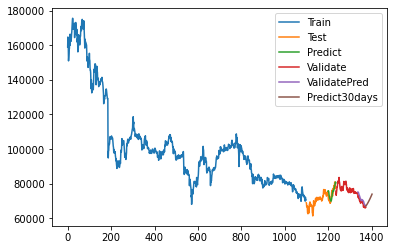

In [479]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()